# Import the library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Load data set

In [2]:
data = pd.read_csv("flight.csv")

# Description
This dataset has 62988 rows dan 23 columns. Column names themselves are self explanatory, however here I provide several columns explanation related to aviation industry:
1.	MEMBER_NO: ID Member
2.	FFP_DATE: Frequent Flyer Program Join Date
3.	FFP_TIER: Frequent Flyer Program Tier
4.	LOAD_TIME: Observed Time
5.	FLIGHT_COUNT: Customer Flight Count
6.	BP_SUM: Itinerary
7.	SUM_YR_1: Fare Revenue
8.	SUM_YR_2: Votes Prices
9.	SEG_KM_SUM: Total flight kilometers in observation window
10.	LAST_FLIGHT_DATE: Last Flight Date
11.	LAST_TO_END: The last flight time to the end of the observation window
12.	AVG_INTERVAL: Average flight interval
13.	MAX_INTERVAL: Maximum flight interval
14.	EXCHANGE_COUNT**: Exchange count
15.	avg_discount: Average discount rate
16.	Points_Sum: The number of points earned by the customer
17.	Points_NotFlight: Point not used by customers



#  Preliminary Look and Data Cleansing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
data.shape

(62988, 23)

* This dataset contains 62988 Row and 23 Columns
* There are several columns that have missing values.
* FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE should be datetime
* Feature AGE should be in integer

In [5]:
data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## Missing values

In [6]:
# number of missing values per column
data.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [7]:
# percentage version
data.isna().sum() * 100 / len(data)

MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602273
WORK_PROVINCE        5.156538
WORK_COUNTRY         0.041278
AGE                  0.666794
LOAD_TIME            0.000000
FLIGHT_COUNT         0.000000
BP_SUM               0.000000
SUM_YR_1             0.874770
SUM_YR_2             0.219089
SEG_KM_SUM           0.000000
LAST_FLIGHT_DATE     0.000000
LAST_TO_END          0.000000
AVG_INTERVAL         0.000000
MAX_INTERVAL         0.000000
EXCHANGE_COUNT       0.000000
avg_discount         0.000000
Points_Sum           0.000000
Point_NotFlight      0.000000
dtype: float64

In [8]:
# Portion missing values considering all columns
((data.shape[0] - data.dropna().shape[0])/data.shape[0])*100

7.514129675493744

The dataset has 7.51% missing values (under 10%), which are found in features `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, `SUM_YR_2`

## Duplicate Data

In [9]:
# number of duplicated data
data.duplicated().sum()

0

no duplicate data

# Data Understanding

## Statistical summary

In [10]:
numericals = data.select_dtypes(include=[np.number], exclude=[np.bool_]).columns
categoricals = data.select_dtypes(exclude=[np.number]).columns

In [11]:
# numerical statistical sumary
data[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [12]:
# value counts discrete columns
cols = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
for col in cols:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of FFP_TIER column
FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64 

Value counts of AGE column
AGE
47.0     2727
38.0     2713
37.0     2683
42.0     2622
39.0     2595
         ... 
110.0       1
87.0        1
7.0         1
12.0        1
91.0        1
Name: count, Length: 84, dtype: int64 

Value counts of FLIGHT_COUNT column
FLIGHT_COUNT
2      10394
3       6477
4       5494
5       4321
6       3676
       ...  
154        1
189        1
117        1
137        1
210        1
Name: count, Length: 153, dtype: int64 

Value counts of BP_SUM column
BP_SUM
0        565
1000     257
700      120
1526     120
2671     105
        ... 
19904      1
19056      1
23867      1
20622      1
503        1
Name: count, Length: 23449, dtype: int64 

Value counts of SUM_YR_1 column
SUM_YR_1
0.0        9915
960.0       174
690.0       151
700.0       143
1024.0      136
           ... 
16757.0       1
13291.0       1
16505.0       1
19493.0       1
889.0         1


* Majority of features have a mean > median value, which indicates that the features tend to have a positively skewed distribution.
* `MEMBER_NO`, `FFP_TIER`, `avg_discount` has a mean value that is almost the same as the median, which indicates that the feature tends to approach a normal distribution.
* The maximum value of the `AGE` feature is 110, that age doesn't make sense, too old to travel by plane
* There is a value of 0 in the feature `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `AVG_INTERVAL`, `MAX_INTERVAL`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight`

In [13]:
# describe method on categorical data
data[categoricals].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [14]:
# showing the precise value counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of FFP_DATE column
FFP_DATE
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: count, Length: 3068, dtype: int64 

Value counts of FIRST_FLIGHT_DATE column
FIRST_FLIGHT_DATE
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: count, Length: 3406, dtype: int64 

Value counts of GENDER column
GENDER
Male      48134
Female    14851
Name: count, dtype: int64 

Value counts of WORK_CITY column
WORK_CITY
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: count, Length: 3234, dtype: int64 

Value counts of WORK_PROVINCE column
WORK_PROVINCE
guangdong  

In [15]:
print('Percentage')
print(f'Male       : {round(48134/62985*100, 2)} %')
print(f'guangzhou  : {round(9386/60719*100, 2)} %')
print(f'guangdong  : {round(17509/59740*100, 2)} %')
print(f'CN         : {round(57748/62962*100, 2)} %')

Percentage
Male       : 76.42 %
guangzhou  : 15.46 %
guangdong  : 29.31 %
CN         : 91.72 %


# Univariate Analysis

## Numerical Feature

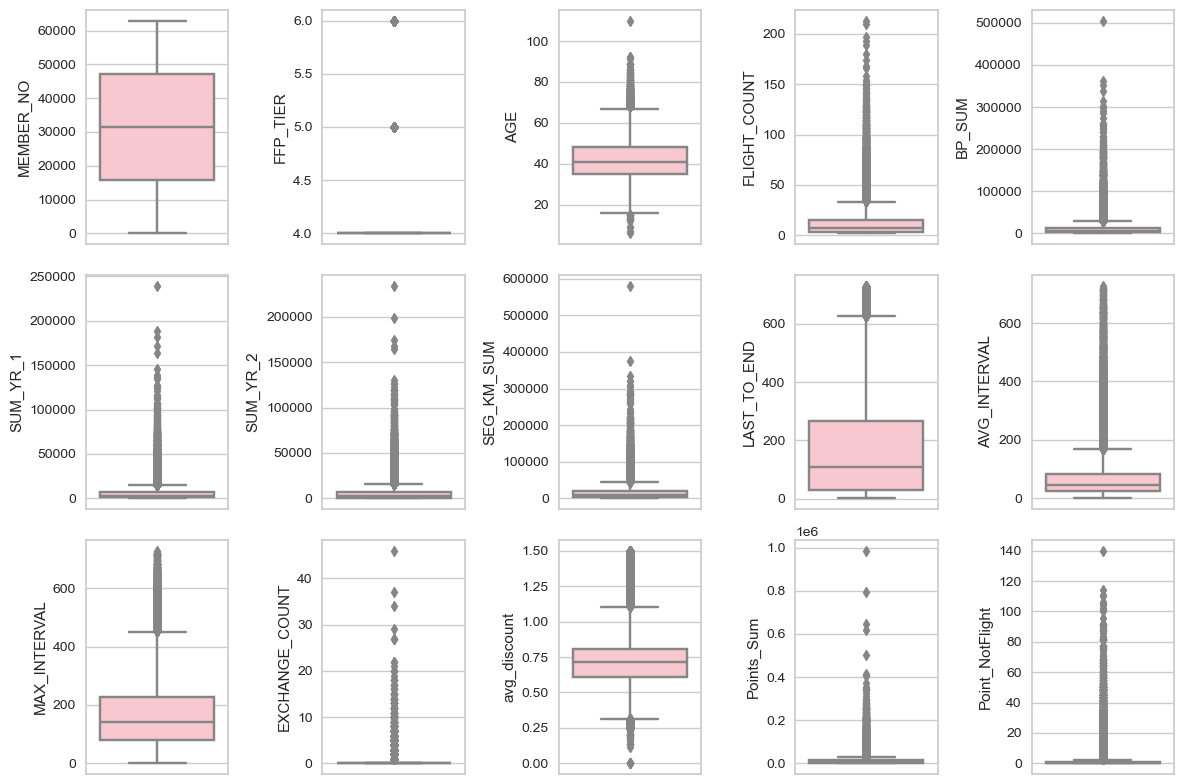

In [16]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(12, 8))
for i in range(0, len(numericals)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=data[numericals[i]], color='pink', orient='v')
    plt.tight_layout()

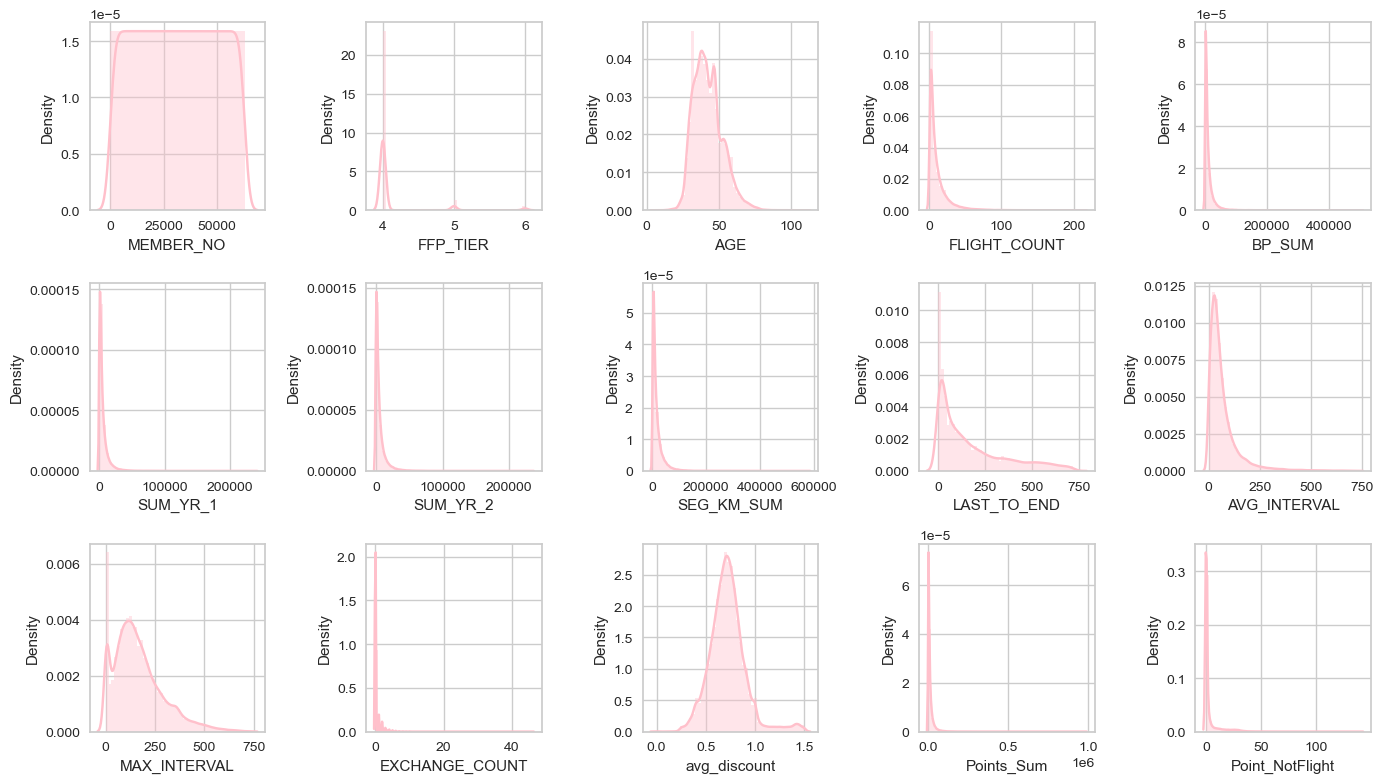

In [17]:
plt.figure(figsize=(14, 8))
for i in range(0, len(numericals)):
    plt.subplot(3, 5, i+1)
    sns.distplot(data[numericals[i]], color='pink')
    plt.tight_layout()

# Categorical Features

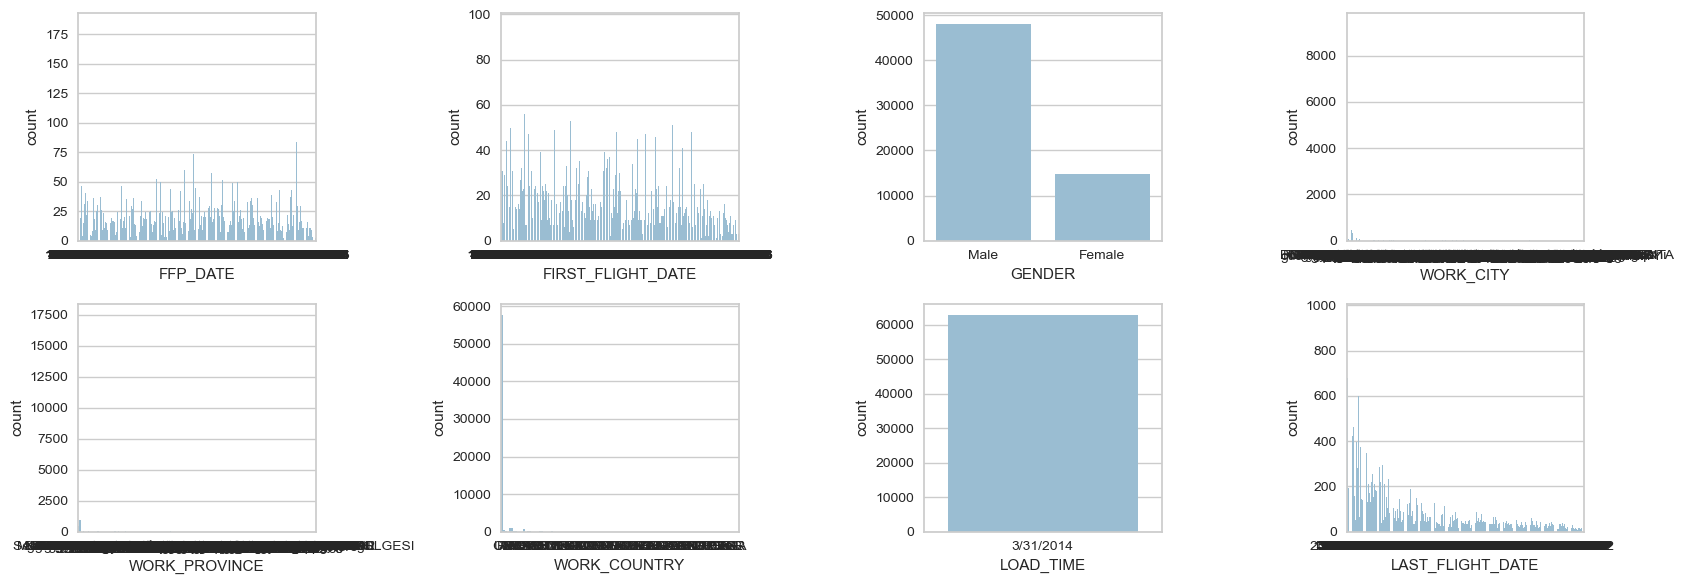

In [18]:
# countplot feature kategorikal
plt.figure(figsize=(17, 6))
for i in range(0, len(categoricals)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=data[categoricals[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

There are too many unique values so I decided to simplify it to just the top 10

In [19]:
top_10_city = data['WORK_CITY'].value_counts().head(10)
top_10_province = data['WORK_PROVINCE'].value_counts().head(10)
top_10_country = data['WORK_COUNTRY'].value_counts().head(10)

Text(0, 0.5, 'count')

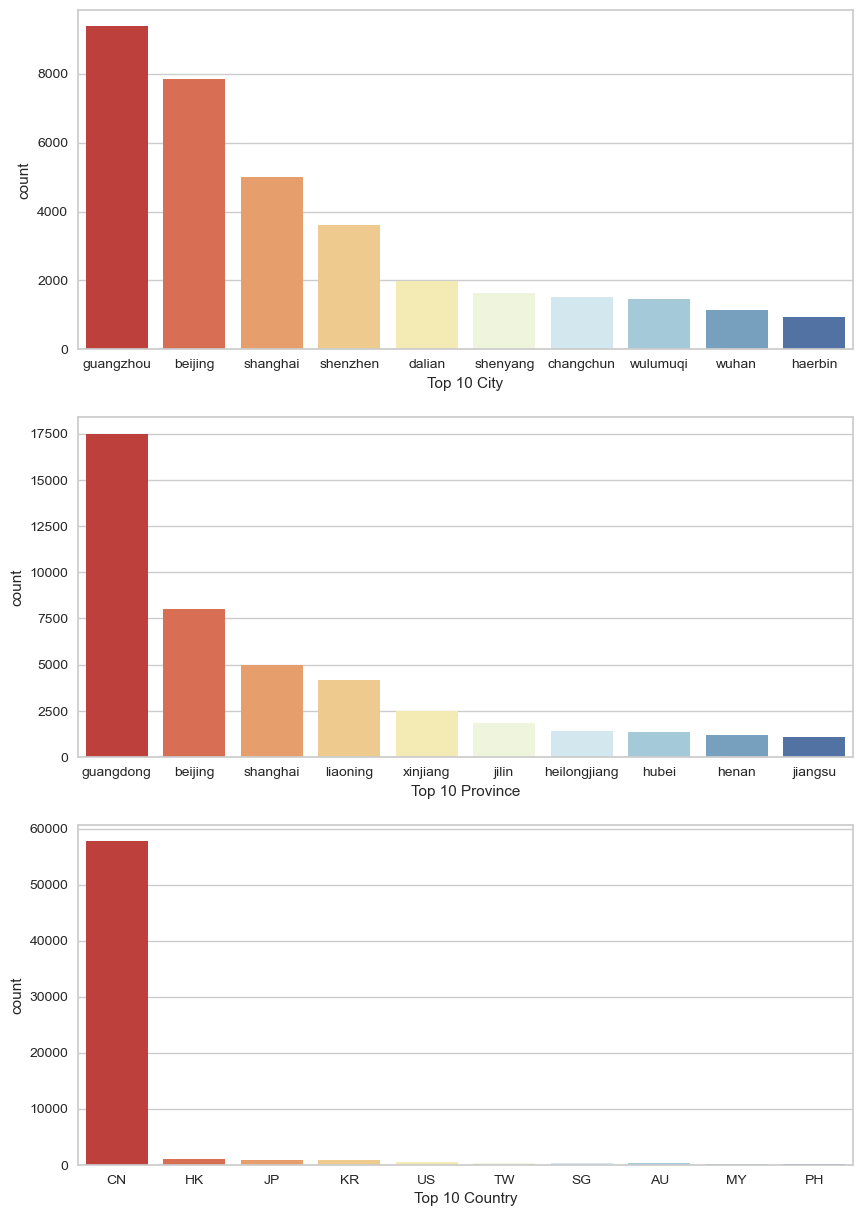

In [20]:
fig, ax = plt.subplots(3, 1,figsize=(10,15))
sns.barplot(x=top_10_city.index,y=top_10_city.values,ax=ax[0], palette=('RdYlBu'))
ax[0].set_xlabel('Top 10 City')
ax[0].set_ylabel('count')

sns.barplot(x=top_10_province.index,y=top_10_province.values,ax=ax[1], palette=('RdYlBu'))
ax[1].set_xlabel('Top 10 Province')
ax[1].set_ylabel('count')

sns.barplot(x=top_10_country.index,y=top_10_country.values,ax=ax[2], palette=('RdYlBu'))
ax[2].set_xlabel('Top 10 Country')
ax[2].set_ylabel('count')

In [21]:
FFP = pd.to_datetime(data['FFP_DATE']).dt.year
FFD = pd.to_datetime(data['FIRST_FLIGHT_DATE']).dt.year
LFD = data.copy()
# Delete 2014/2/29 is not a leap year
LFD.drop(LFD[LFD.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)
LFD = pd.to_datetime(LFD['LAST_FLIGHT_DATE']).dt.year

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

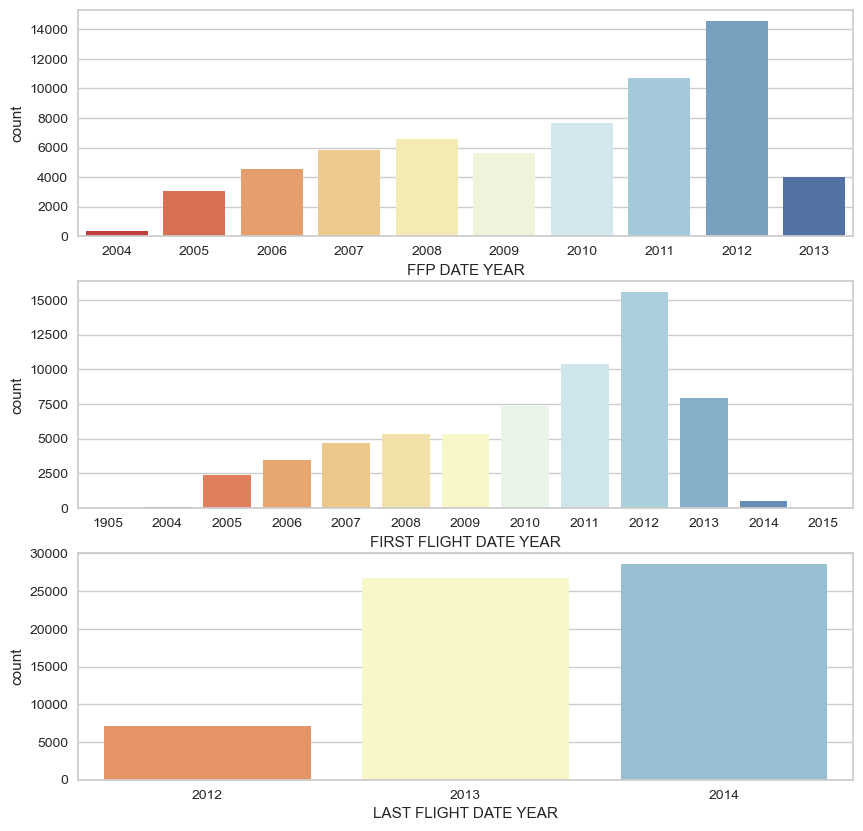

In [22]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,10))
sns.countplot(x=FFP,ax=ax[0], palette=('RdYlBu'))
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

sns.countplot(x=FFD, ax=ax[1], palette=('RdYlBu'))
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')

sns.countplot(x=LFD, ax=ax[2], palette=('RdYlBu'))
ax[2].tick_params(axis='x')
ax[2].set_xlabel('LAST FLIGHT DATE YEAR')

* The majority of features has a positively skew distribution, except for MEMBER_NO and avg_discount which tends to be close to normal.
* The majority of features have outliers
* The majority of categorical features have unique values
* The majority of users who joined became members in 2012
* There is a year value that is very far away in the FIRST FLIGHT DATE feature, namely 1905, maybe this is an input error
* In the LAST_FLIGHT_DATE feature there is a date value that does not make sense, namely the date 2014/2/29, this year is not a leap year so there is no 29th in February.

# Multivariate Analysis

## Heatmap

In [23]:
# correlation heatmap
#plt.figure(figsize=(10,10))
#correlation = data.corr()
#sns.heatmap(correlation, annot=True, fmt='.2f')

Features that have high correlation:

* Among the features FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, Points_Sum
* AVG_INTERVAL with MAX_INTERVAL
* Features FLIGHT_COUNT, BP_SUM,SUM_YR_1, SUM_YR_2, SEG_KM_SUM are highly correlated with each other. The more frequently a customer purchases or flies, the longer the flight distance covered and the more fare revenue.

#Feature Engginering

Based on the observations above, we don't need `MEMBER_NO`,`GENDER`,`WORK_CITY`,`WORK_PROVINCE`,`WORK_COUNTRY`, so I decided to drop the feature

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [25]:
#delete work_city, work_province, work_country, gender columns
data = data.drop(['MEMBER_NO','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   FFP_TIER           62988 non-null  int64  
 3   AGE                62568 non-null  float64
 4   LOAD_TIME          62988 non-null  object 
 5   FLIGHT_COUNT       62988 non-null  int64  
 6   BP_SUM             62988 non-null  int64  
 7   SUM_YR_1           62437 non-null  float64
 8   SUM_YR_2           62850 non-null  float64
 9   SEG_KM_SUM         62988 non-null  int64  
 10  LAST_FLIGHT_DATE   62988 non-null  object 
 11  LAST_TO_END        62988 non-null  int64  
 12  AVG_INTERVAL       62988 non-null  float64
 13  MAX_INTERVAL       62988 non-null  int64  
 14  EXCHANGE_COUNT     62988 non-null  int64  
 15  avg_discount       62988 non-null  float64
 16  Points_Sum         629

In [27]:
# Drop invalid date
data.drop(data[data['LAST_FLIGHT_DATE'].str.contains('2014/2/29')].index, inplace=True)

In [28]:
data['LAST_FLIGHT_DATE'] = pd.to_datetime(data['LAST_FLIGHT_DATE'])
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])
data['FIRST_FLIGHT_DATE'] = pd.to_datetime(data['FIRST_FLIGHT_DATE'])
data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62567 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62567 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 2   FFP_TIER           62567 non-null  int64         
 3   AGE                62148 non-null  float64       
 4   LOAD_TIME          62567 non-null  datetime64[ns]
 5   FLIGHT_COUNT       62567 non-null  int64         
 6   BP_SUM             62567 non-null  int64         
 7   SUM_YR_1           62016 non-null  float64       
 8   SUM_YR_2           62429 non-null  float64       
 9   SEG_KM_SUM         62567 non-null  int64         
 10  LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 11  LAST_TO_END        62567 non-null  int64         
 12  AVG_INTERVAL       62567 non-null  float64       
 13  MAX_INTERVAL       62567 non-null  int64         
 14  EXCHANGE_CO

## Missing Value Handling

In [30]:
# number of missing values per column
data.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
AGE                  419
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [31]:
# Portion missing values considering all columns
((data.shape[0] - data.dropna().shape[0])/data.shape[0])*100

1.7629101603081496

In [32]:
# drop na values
data = data.dropna()

In [33]:
# sanity check
data.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

there are no null values !

## Duplicated Data Handling

In [34]:
# number of duplicated data
data.duplicated().sum()

8

there are 8 duplicate data, I will delete the duplicate data

In [35]:
data = data.drop_duplicates()

In [36]:
# sanity check
data.duplicated().sum()

0

# Features Selection

* L (LOYALTY)   : LOAD_TIME - FPP_DATE
* R (RECENCY)   : LAS_TO_END
* F (FREQUENCY) : FLIGHT_COUNT
* M (MONETARY)  : SEG_KM_SUM
* C (DISCOUNT)  : AVG_DISCOUNT
<br>
So the features taken:

* FPP_DATE (Frequent Flyer Program Join Date)
* LOAD_TIME (Date Data Captured)
* FLIGHT_COUNT (Number of Customer Flights)
* AVG_DISCOUNT (Average Discount Received by Customers)
* SEG_KM_SUM (Total Distance (km) of Flights Made)
* LAS_TO_END (distance Last Flight Time to Most Recent Flight Booking)

Reference :
* Analysis Method For Customer Value of Aviation Big Data Based on LRFMC Model by Yang Tao

In [37]:
# select feature
df_feats = data[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [38]:
# membuat feature untuk loyalti dari feature yang sudah ada
df_feats['TIME_MONTH'] = ((data['LOAD_TIME'] - data['FFP_DATE']).dt.days/30).astype(int)

In [39]:
df_feats = df_feats[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()

In [40]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61456 entries, 0 to 62986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61456 non-null  int32  
 1   LAST_TO_END   61456 non-null  int64  
 2   FLIGHT_COUNT  61456 non-null  int64  
 3   SEG_KM_SUM    61456 non-null  int64  
 4   avg_discount  61456 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.6 MB


In [41]:
df_feats.head()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,90,1,210,580717,0.961639
1,86,7,140,293678,1.252314
2,87,11,135,283712,1.254676
3,68,97,23,281336,1.090870
4,60,5,152,309928,0.970658


## Outlier Handling

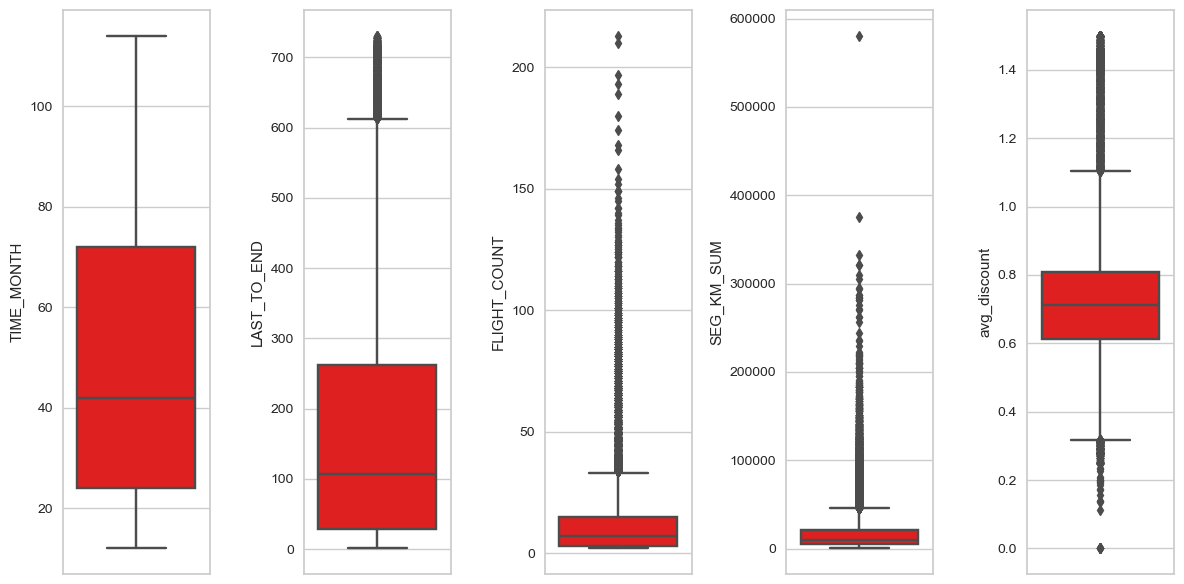

In [42]:
plt.figure(figsize=(12, 6))

# plotting
features = ('TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount')
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df_feats[features[i]], color='red')
    plt.tight_layout()

In [43]:
print(f'Before outlier treatment : {len(df_feats)}')

fil_ent = np.array([True] * len(df_feats))
for col in features:
    Q1 = df_feats[col].quantile(0.25)
    Q3 = df_feats[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_feats[col] >= low_limit) & (df_feats[col] <= high_limit)) & fil_ent

df_feats = df_feats[fil_ent].reset_index()

print('After outlier treatment :', len(df_feats))

Before outlier treatment : 61456
After outlier treatment : 51644


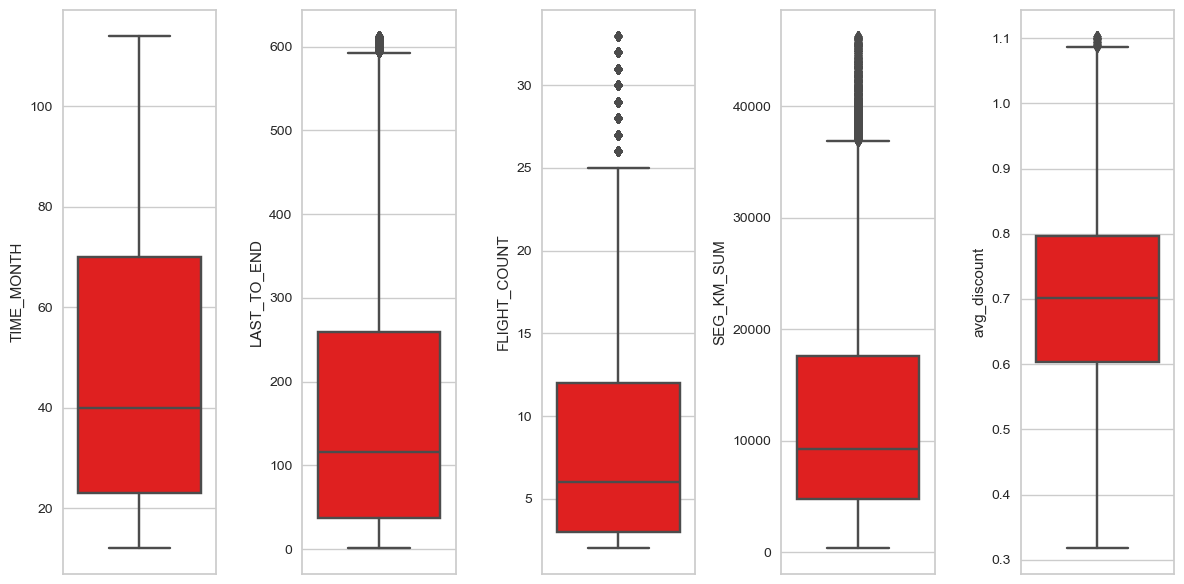

In [44]:
plt.figure(figsize=(12, 6))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df_feats[features[i]], color='red')
    plt.tight_layout()

In [45]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51644 entries, 0 to 51643
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         51644 non-null  int64  
 1   TIME_MONTH    51644 non-null  int32  
 2   LAST_TO_END   51644 non-null  int64  
 3   FLIGHT_COUNT  51644 non-null  int64  
 4   SEG_KM_SUM    51644 non-null  int64  
 5   avg_discount  51644 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 2.2 MB


In [46]:
df_feats = df_feats.drop(['index'], axis = 1)

In [47]:
df_feats.columns =['L', 'R', 'F', 'M', 'C']

In [48]:
df_feats.head()

,L,R,F,M,C
0,81,16,28,46152,1.098501
1,90,16,29,43790,1.099567
2,72,108,8,45604,1.042694
3,44,7,29,44033,1.059304
4,78,436,6,45460,1.019714


# Feature Standardization

In [49]:
feats = ['L', 'R', 'F', 'M', 'C']
X = df_feats[feats].values
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)

In [50]:
new_df.describe()

,L,R,F,M,C
count,5.164400e+04,5.164400e+04,5.164400e+04,5.164400e+04,5.164400e+04
mean,-3.081899e-17,-5.723526e-17,7.044340e-17,8.805425e-17,-4.842984e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.280184e+00,-1.045017e+00,-9.692289e-01,-1.218030e+00,-2.635483e+00
25%,-8.850453e-01,-8.225078e-01,-8.268249e-01,-7.762247e-01,-6.606291e-01
50%,-2.743759e-01,-3.342227e-01,-3.996130e-01,-3.191657e-01,2.024013e-02
75%,8.032762e-01,5.496350e-01,4.548109e-01,5.152853e-01,6.738480e-01
max,2.383832e+00,2.737646e+00,3.445295e+00,3.407030e+00,2.796093e+00


# Modeling

## Elbow Method & Silhouette Score

<Axes: >

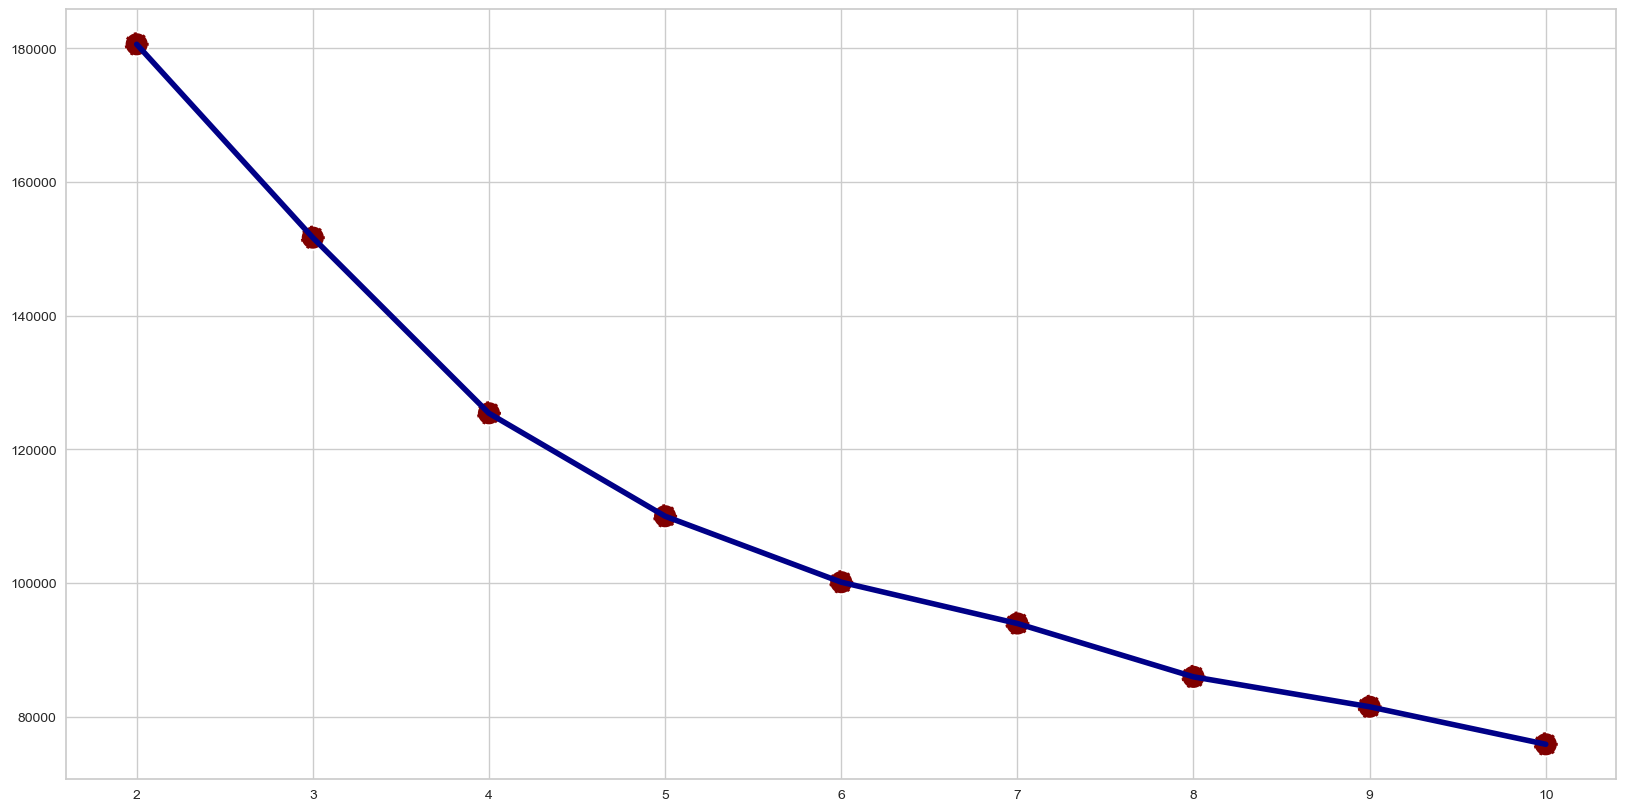

In [51]:
list_inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df.values)
    list_inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=list_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=list_inertia, s=300, color='#800000',  linestyle='--')

Berdasarkan grafik yang dihasilkan penurunaan nilai dan patahan yang tajam pada nilai 5, sehingga nilai k yang optimal adalah 5

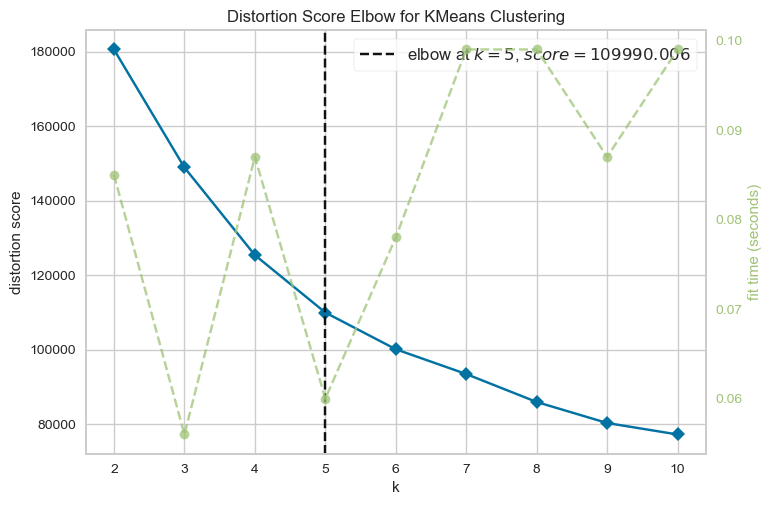

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(new_df)
visualizer.show()

In [53]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [54]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

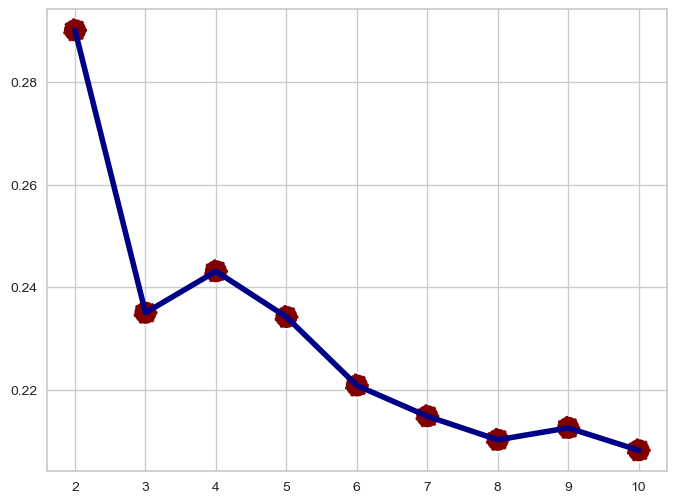

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Berdasarkan pertimbangan analisis sebelumnya, maka dipilih k = 5 untuk n-cluster pada analisis K-Means.

c

In [56]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(new_df)
new_df['cluster'] = kmeans.labels_

In [57]:
new_df.head()

,L,R,F,M,C,cluster
0,1.198415,-0.952305,2.733275,3.391726,2.759246,2
1,1.521711,-0.952305,2.875679,3.153908,2.766607,2
2,0.875120,-0.383669,-0.114805,3.336551,2.373694,2
3,-0.130689,-1.007932,2.875679,3.178375,2.488449,2
4,1.090650,1.643641,-0.399613,3.322052,2.214939,2


# Visualization

For visualization, i will using PCA

In [58]:
pca = PCA(n_components=2)

pca.fit(new_df)
pcs = pca.transform(new_df)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = new_df['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,-2.182149,4.323461,2
1,-2.258711,4.230440,2
2,-1.027125,2.466139,2
3,-1.789128,4.398976,2
4,-0.190581,1.847159,2


In [59]:
# Create a scatter plot
fig = px.scatter(data_pca, x="PC 1", y="PC 2", color="cluster",
                 color_discrete_sequence=["blue", "orange", "green", "red", "purple"],
                 opacity=0.7, size_max=10)

fig.update_layout(
    width=900,
    height=600,
    title="Customer Segmentation Based on LRFMC Model",
    title_x=0.5,
    xaxis_title="PC 1",
    yaxis_title="PC 2"
)

fig.show()


In [60]:
cluster_counts = new_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Numbers Of Customers']

fig = px.bar(cluster_counts, x='Cluster', y='Numbers Of Customers', title="Number of customers in each cluster")
fig.update_xaxes(categoryorder='total ascending')
fig.update_yaxes(title_text="Numbers Of Customers")

fig.update_layout(
    width=1200,
    height=650,
    title_x=0.5
)

fig.show()

Number of consumers in each cluster
* Cluster 0 = 9.969
* Cluster 1 = 13.552
* Cluster 2 = 8.302
* Cluster 3 = 10.491
* Cluster 4 = 9.521

In [61]:
n1 = pd.Series(kmeans.labels_)
n2 = n1.value_counts()
n3 = pd.DataFrame(kmeans.cluster_centers_)
r = pd.concat([n3,n2],axis = 1)
r.index = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
r.columns = ['L','R','F','M','C','Count']

In [62]:
n1 = pd.Series(kmeans.labels_)
n2 = n1.value_counts()
n3 = pd.DataFrame(kmeans.cluster_centers_)
r = pd.concat([n3,n2],axis = 1)
r.index = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
r.columns = ['L','R','F','M','C','Count']

In [63]:
r

,L,R,F,M,C,Count
Cluster1,-0.240018,1.762221,-0.698955,-0.664377,0.290921,8594
Cluster2,-0.638165,-0.371457,-0.226760,-0.280019,0.612989,12537
Cluster3,0.188315,-0.670533,1.629329,1.603586,0.101153,10070
Cluster4,-0.527240,-0.082467,-0.502405,-0.440459,-1.199710,10079
Cluster5,1.298689,-0.280507,-0.241309,-0.241087,0.090376,10364


<Figure size 1200x1000 with 0 Axes>

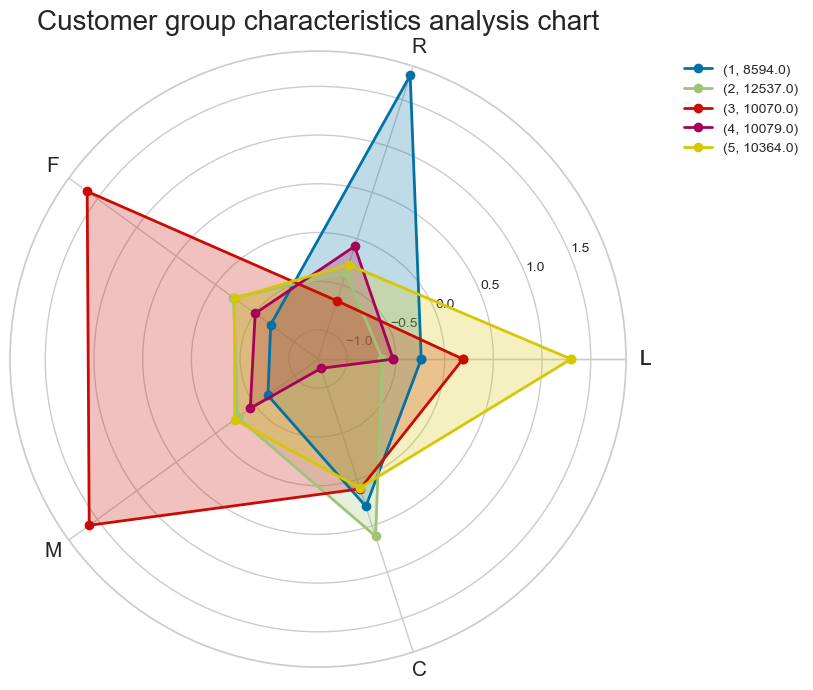

In [64]:
fig = plt.figure(figsize=(12, 10))

nmax = n3.values.max()
nmin = n3.values.min()
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,polar = True)
center_num = r.values
feature = ['L','R','F','M','C']
N = len(feature)
for i,v in enumerate(center_num):
    angles = np.linspace(0,2*np.pi,N,endpoint = False)
    center = np.concatenate((v[:-1],[v[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    ax.plot(angles,center,'o-',linewidth = 2,label = (i+1,v[-1]))
    ax.fill(angles,center,alpha = 0.25)

# **Set the labels for the theta gridlines**
ax.set_thetagrids(angles * 180/np.pi, feature + [feature[0]], fontsize=15)

ax.set_ylim(nmin - 0.1,nmax + 0.1)
plt.title(u'Customer group characteristics analysis chart',fontsize = 20)
ax.grid(True)
plt.legend(loc = 'upper right',bbox_to_anchor = (1.3,1.0),ncol = 1,fancybox = True,shadow = True)

plt.show()

Based on the data and visual chart, the clustering results are analyzed. Through the chart observation, we can see that:
1. `Cluster 1 - Potential Loyalist` - 9969
   * Cluster 1 is the largest in F and M attributes, and the average in L, R and C attributes.
2. `Cluster 2 - The Cheap Customers` - 13552
  *  Cluster 2 is the largest in C attribute and relatively average in L, R, F and M
3. `Cluster 3 - Hibernating` - 8302
   * Cluster 3 is the largest in R attribute and relatively average in L, F, M and C
4. `Cluster 4 - Loyal Customers` - 10491
  * Cluster 4 is the largest in L attribute and relatively average in R, F, M and C.
5. `Cluster 5 - Need Attention` - 9521
  * Cluster 5 is Lowest in C attribute and relatively average in L, R, F, and M.

# Business Recommendation

1. Cluster 1: Potential Loyalist

  * Program loyalitas yang menarik: Maskapai dapat menawarkan program loyalitas dengan poin yang dapat ditukarkan dengan tiket gratis, upgrade kelas, atau hadiah lainnya.
  * Layanan yang berkualitas: Maskapai dapat memberikan layanan yang berkualitas, seperti makanan dan minuman gratis, hiburan di dalam pesawat, dan proses check-in yang cepat.
  * Hubungan dengan pelanggan: Maskapai dapat membangun hubungan dengan pelanggan dengan mengirim email atau SMS untuk memberikan informasi dan promosi.

2. Cluster 2: The Cheap Customers

  * Tarif yang kompetitif: Maskapai dapat menawarkan tarif yang kompetitif dengan maskapai lain.
  * Promo dan diskon: Maskapai dapat menawarkan promo dan diskon, seperti diskon untuk pembelian tiket di awal atau diskon untuk penerbangan pulang pergi.
  * Efisiensi operasional: Maskapai dapat meningkatkan efisiensi operasional untuk menurunkan biaya, sehingga dapat menawarkan tarif yang lebih kompetitif.

3. Cluster 3: Hibernating

  * Pengingat pelanggan: Maskapai dapat mengirim email atau SMS untuk mengingatkan pelanggan tentang penerbangan mereka yang akan datang.
  * Promosi khusus: Maskapai dapat menawarkan promosi khusus untuk pelanggan yang sudah lama tidak terbang, seperti diskon atau upgrade kelas.
  * Peningkatan kualitas layanan pelanggan: Maskapai dapat meningkatkan kualitas layanan pelanggan untuk memberikan pengalaman yang lebih positif kepada pelanggan.

4. Cluster 4: Loyal Customers

  * Layanan premium: Maskapai dapat menawarkan layanan premium, seperti check-in prioritas, lounge bandara, atau makanan dan minuman gratis.
  * Penghargaan kepada pelanggan loyal: Maskapai dapat memberikan penghargaan kepada pelanggan loyal, seperti poin tambahan, upgrade kelas, atau hadiah lainnya.
  * Peningkatan pengalaman pelanggan: Maskapai dapat meningkatkan pengalaman pelanggan dengan menawarkan layanan yang lebih personal dan disesuaikan dengan kebutuhan pelanggan.

5. Cluster 5: Need Attention

  * Promosi khusus: Maskapai dapat menawarkan promosi khusus untuk pelanggan baru, seperti diskon atau penerbangan gratis.
  * Kesadaran merek: Maskapai dapat meningkatkan kesadaran merek melalui iklan, promosi, atau media sosial.
  * Lakukan survei kepuasan pelanggan untuk memahami permasalahan yang mereka alami.
  * Peningkatan kualitas layanan pelanggan: Maskapai dapat meningkatkan kualitas layanan pelanggan untuk memberikan pengalaman yang positif kepada pelanggan baru.